In [66]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pipeline_utilities as p_utils
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Retrieve Data

In [67]:
# Import scaled earthquake data
df = pd.read_csv('../../Resources/earthquake_data_standardized.csv')
df.head()

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density,mmi_class
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,-1.885829,2
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0.643055,0
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,-0.257281,0
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,1.440778,0
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,-0.138119,1


## Create X and y

In [68]:
# Define features and target
X = df.drop(columns='mmi_class', axis=1)
y = df['mmi_class']
display(X.head())
display(y[:5])

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,soil_density
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,-1.885829
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0.643055
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,-0.257281
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,1.440778
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,-0.138119


0    2
1    0
2    0
3    0
4    1
Name: mmi_class, dtype: int64

## Split Data into Train and Test Data Sets

In [69]:
# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Basic Support Vector Classifier (SVC) Model

In [70]:
# Instantiate the model and fit it to the train data
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [71]:
# Make predictions and calculate balanced accuracy and classification report
train_predict = svc.predict(X_train)
test_predict = svc.predict(X_test)

# Determine balanced accuracies
print(f'Balanced Accuracy - Train: {balanced_accuracy_score(y_train, train_predict):.3f}')
print(f'Balanced Accuracy - Test: {balanced_accuracy_score(y_test, test_predict):.3f}')

# Print classification report
print(classification_report(y_test, test_predict))

Balanced Accuracy - Train: 0.740
Balanced Accuracy - Test: 0.587
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        90
           1       0.48      0.67      0.56        81
           2       0.80      0.41      0.54        69

    accuracy                           0.60       240
   macro avg       0.65      0.59      0.59       240
weighted avg       0.64      0.60      0.60       240



## Evaluate SVC Model Using Reduced Feature Sets

Calculate the p-value of each feature.

In [43]:
# Calculate p-values
pvalues = utils.calculate_pvalues(X_train, y_train)

display(pvalues)

Remove each feature one by one by setting the cutoff value for p to the p-value of each feature.

In [46]:
# Create a list of p-value cutoffs that are equal to the p-values of each feature
cutoffs = pvalues[pvalues > min(pvalues)].sort_values(ascending=False).to_list()
# Create a dictionary to store the results of the feature removal
pvalues_optimization = {'Number of Features Removed': range(1, len(cutoffs)+1),
                        'Cutoffs': cutoffs,
                        'Train Accuracy': [],
                        'Test Accuracy': []}

for cutoff in cutoffs:
    # Remove features from train and test data
    X_train_reduced = X_train[pvalues[pvalues < cutoff].keys()]
    X_test_reduced = X_test[pvalues[pvalues < cutoff].keys()]

    # Instantiate and fit an SVM model
    lr = SVC()
    lr.fit(X_train_reduced, y_train)

    # Make predictions for train and test data
    train_predict = lr.predict(X_train_reduced)
    test_predict = lr.predict(X_test_reduced)

    # Record the accuracy for train and test data
    pvalues_optimization['Train Accuracy'].append(balanced_accuracy_score(y_train, train_predict))
    pvalues_optimization['Test Accuracy'].append(balanced_accuracy_score(y_test, test_predict))

# Create a DataFrame for the results
df_pvalues_optimization = pd.DataFrame(pvalues_optimization).set_index('Number of Features Removed')

AttributeError: module 'utilities' has no attribute 'remove_features'

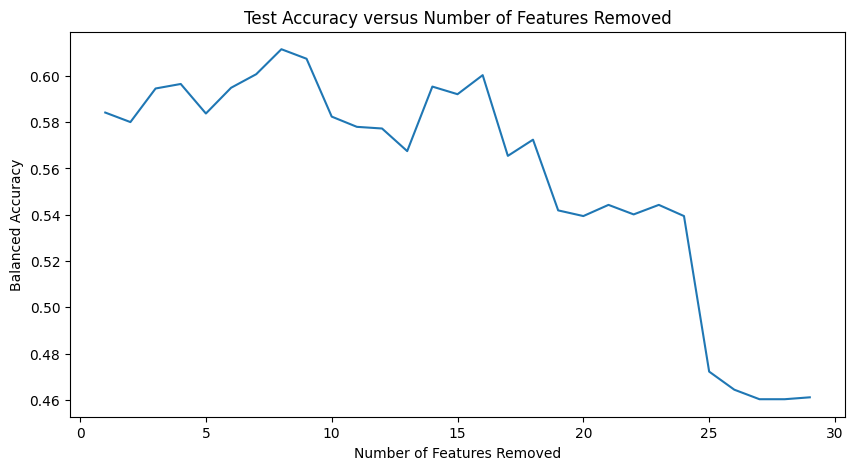

In [9]:
# Plot the Test Accuracy versus the number of features removed
plt.figure(figsize = (10,5))
plt.plot(df_pvalues_optimization.index,
         df_pvalues_optimization['Test Accuracy'])
plt.title('Test Accuracy versus Number of Features Removed')
plt.xlabel('Number of Features Removed')
plt.ylabel('Balanced Accuracy')

plt.show()

In [10]:
# Find the record with the maximim test accuracy
max_test_accuracy = max(df_pvalues_optimization['Test Accuracy'])
max_accuracy_record = df_pvalues_optimization[df_pvalues_optimization['Test Accuracy']==max_test_accuracy]

display(max_accuracy_record)

,Cutoffs,Train Accuracy,Test Accuracy
Number of Features Removed,,,
8,0.640527,0.703149,0.611487


**Conclusion:** As compared to the base model, slight improvement of the test accuracy with decrease in train accuracy when we remove 8 features. However, it is still not very close to our target and the test accuracy is worse than that of the Random Forest Classifier model.

### Reduce Number of Features Using PCA

In [11]:
# Optimize the number of principal components to use
# Define a list used to vary the number of principal components to try from 2 to the number of
# features minus 1.
n_principal_components = range(2, len(X.columns))

pca_optimization = {'Components': n_principal_components,
                    'Explained Variance': [],
                    'Train Accuracy': [],
                    'Test Accuracy': []}

# Loop over the number of principal components to try
for n_comps in n_principal_components:
    # Instantiate a PCA model
    pca = PCA(n_components=n_comps, random_state=1)

    # Fit the PCA model to the train data
    pca.fit(X_train)

    # Transform train and test data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Record the explained variance
    pca_optimization['Explained Variance'].append(pca.explained_variance_ratio_.sum())

    # Instantiate and fit a Random Forest Classifier model with the PCA feature set
    lr_pca = SVC()
    lr_pca.fit(X_train_pca, y_train)

    # Predict the train data and record the Balanced Accuracy Score
    train_pca_predict = lr_pca.predict(X_train_pca)
    pca_optimization['Train Accuracy'].append(balanced_accuracy_score(y_train, train_pca_predict))

    # Predict the test data and record the Balanced Accuracy Score
    test_pca_predict = lr_pca.predict(X_test_pca)
    pca_optimization['Test Accuracy'].append(balanced_accuracy_score(y_test, test_pca_predict))

# Create a DataFrame
df_pca_optimization = pd.DataFrame(pca_optimization).set_index('Components')

display(df_pca_optimization)

,Explained Variance,Train Accuracy,Test Accuracy
Components,,,
2,0.343087,0.501352,0.497209
3,0.427421,0.517934,0.484434
4,0.497379,0.524377,0.524763
5,0.555723,0.539682,0.554804
6,0.611851,0.561501,0.548613
7,0.656105,0.560215,0.536787
8,0.695707,0.580840,0.495133
9,0.730870,0.613618,0.519932
10,0.764880,0.627017,0.502755


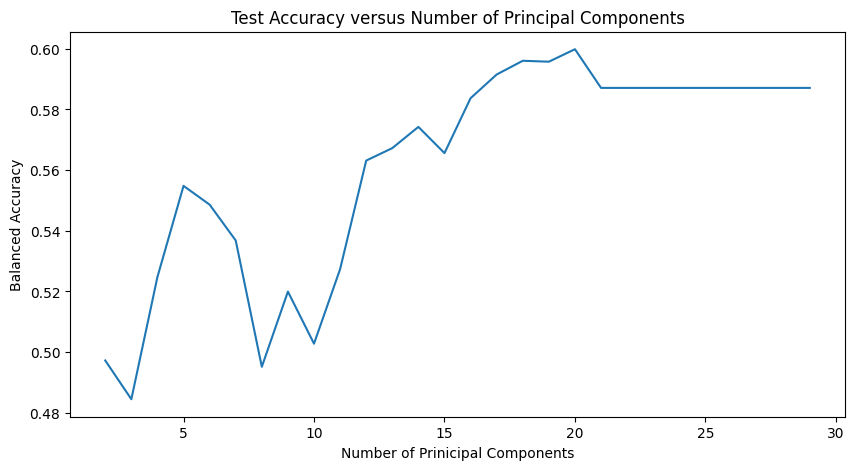

In [12]:
# Plot Accuracy versus number of principal components
plt.figure(figsize = (10,5))
plt.plot(df_pca_optimization.index,
         df_pca_optimization['Test Accuracy'])
plt.title('Test Accuracy versus Number of Principal Components')
plt.xlabel('Number of Prinicipal Components')
plt.ylabel('Balanced Accuracy')

plt.show()

In [13]:
# Find the record with the maximim test accuracy
max_test_accuracy = max(df_pca_optimization['Test Accuracy'])
max_accuracy_record = df_pca_optimization[df_pca_optimization['Test Accuracy']==max_test_accuracy]

display(max_accuracy_record)

,Explained Variance,Train Accuracy,Test Accuracy
Components,,,
20,0.987716,0.732902,0.599875


**Conclusion:** Accuracy still below target of 0.75 and worse than Random Forest Classifier. However, this model as well as the Logistic Regression model is not overfitting.

## Using Hyperparameter Tuning to Improve Performance

We will vary the following hyperparameters.
* C,
* kernel,
* gamma.

Please refer to the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for details.

Use a randomized search estimator to explore the hyperparameter space.

In [19]:
# Define a hyperparameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
#    'gamma': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

# Instantiate a KNN model
svc = SVC()

In [20]:
# Instantiate the Randomized Search Estimator
random_svc = RandomizedSearchCV(lr, param_grid, random_state=0, verbose=3)

# Fit the Randomized Search Estimator on train data
random_svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .............C=0.0001, kernel=poly;, score=0.375 total time=   0.0s
[CV 2/5] END .............C=0.0001, kernel=poly;, score=0.375 total time=   0.0s
[CV 3/5] END .............C=0.0001, kernel=poly;, score=0.385 total time=   0.0s
[CV 4/5] END .............C=0.0001, kernel=poly;, score=0.385 total time=   0.0s
[CV 5/5] END .............C=0.0001, kernel=poly;, score=0.385 total time=   0.0s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.611 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.611 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.559 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.552 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.587 total time=   0.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.375 total time=   0.0s
[CV 2/5] END ................C=0.01, kernel=rbf;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=0, verbose=3)

In [21]:
# Print best hyperparameters
print(random_svc.best_params_)

{'kernel': 'rbf', 'C': 1}


In [22]:
# Make predictions with the hypertuned model
random_lr_train_predict = random_svc.predict(X_train)
random_lr_test_predict = random_svc.predict(X_test)

# Calculate and print the balanced accuracies
print(f"Accuracy - Train: {balanced_accuracy_score(y_train, random_lr_train_predict):.3f}")
print(f"Accuracy - Test: {balanced_accuracy_score(y_test, random_lr_test_predict):.3f}")

# Calculate the classification report
print(classification_report(y_test, random_lr_test_predict))

Accuracy - Train: 0.740
Accuracy - Test: 0.587
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        90
           1       0.48      0.67      0.56        81
           2       0.80      0.41      0.54        69

    accuracy                           0.60       240
   macro avg       0.65      0.59      0.59       240
weighted avg       0.64      0.60      0.60       240

